# INF200 Lecture No 9
### 9 November 2015

## Today's topics

- Review EX06
- Presentation EX07
- Packages in Python
- Scientific Python I: NumPy and Matplotlib
    - Basics
    - Analysing weather data
    - Illustrating a numerical method
    - Markov chain analysis of Chutes & Ladders
    
NB: This lecture will show you examples on how to use NumPy, SciPy, Matplotlib. For details, see the documentation and
introductions on the net:

- J.R.Johanssons' [Introduction to Scientific Computing with Python](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb)
- [Python Scienctific Lecture Notes](http://scipy-lectures.github.io/) 

### Import packages

- A package in the sense of the official [Python Tutorial, ch 6.4](https://docs.python.org/2/tutorial/modules.html)
    - is a directory (folder) containing Python modules
    - the directory **must** contain an `__init__.py` file
    - `__init__.py` can be empty
    - packages can contain subpackages as nested directories
    - some authors call these *multi-file modules* to avoid confusion with "the other" packages ([see Dive into Python 3, ch 15.5](http://www.diveinto.org/python3/case-study-porting-chardet-to-python-3.html#multifile-modules)) 
- Examples for packages
    - `matplotlib`, subpackages e.g. `pyplot`
    - `numpy`, `random`, ...
- To create a package from the notebook, we use the `%mkdir` magic to create directories
    - The `-p` option avoids errors if directory exists

#### The `chutes_project` with example package `chutes`

- One module each for
    - board class(es)
    - player class(es)
    - simulation class(es)
    - helper functions
- Tests as sub-package `tests` in package `chutes`

#### Absolute and relative imports

- Where are modules imported from?
    - `import mymodule` searches `mymodule` in the Python path
    - the path is the list `sys.path`, it is searched in order
    - `''` is the current directory
    - the search stops as soon as one of the following is found:
        - module `mymodule.py` or
        - package `mymodule` (i.e. folder `mymodule` containing `__init__.py`)
    - these imports are called *absolute* imports
- We can inspect `sys.path` my importing `sys` (we can also change `sys.path`)

In [1]:
import sys
print sys.path

['', '/Users/plesser/anaconda/lib/python2.7/site-packages/chutes-0.1.0-py2.7.egg', '/Users/plesser/anaconda/lib/python27.zip', '/Users/plesser/anaconda/lib/python2.7', '/Users/plesser/anaconda/lib/python2.7/plat-darwin', '/Users/plesser/anaconda/lib/python2.7/plat-mac', '/Users/plesser/anaconda/lib/python2.7/plat-mac/lib-scriptpackages', '/Users/plesser/anaconda/lib/python2.7/lib-tk', '/Users/plesser/anaconda/lib/python2.7/lib-old', '/Users/plesser/anaconda/lib/python2.7/lib-dynload', '/Users/plesser/.local/lib/python2.7/site-packages', '/Users/plesser/anaconda/lib/python2.7/site-packages', '/Users/plesser/anaconda/lib/python2.7/site-packages/Sphinx-1.3.1-py2.7.egg', '/Users/plesser/anaconda/lib/python2.7/site-packages/aeosa', '/Users/plesser/anaconda/lib/python2.7/site-packages/setuptools-18.4-py2.7.egg', '/Users/plesser/anaconda/lib/python2.7/site-packages/IPython/extensions']


- Modules within a package often depend on each other
    - must import each other
    - must avoid importing modules of same name elsewhere in `sys.path`

- Solution: relative imports
    - always in 
    
      ```Python
      from <module or package> import <something>
      ``` 
      
      form
    - always start with a `.`
    - see [Tutorial, ch 6.4.2](https://docs.python.org/2/tutorial/modules.html#intra-package-references) and [PEP 328](http://legacy.python.org/dev/peps/pep-0328/)
    
- Relative imports
    - note the `.` before module names: `.simulation`, `.board`
    - marks import as *relative* 
    - Python looks for `simulation.py` and `board.py` only in this package
    - does not look in directories in `sys.path`
    - avoids confusion with modules/packages of same name elsewhere
    - **work only inside packages**

### Distribution Packages

- For detaljer, se
    - [Python Packaging User Guide](https://python-packaging-user-guide.readthedocs.org/en/latest/)
    - [Dive into Python 3, ch 16](http://www.diveinto.org/python3/packaging.html)
    - [PyPA Sample Project on Github](https://github.com/pypa/sampleproject)
- Key idea
    - Make sharing Python-based projects easy
    - Collect 
        - Source code: Python modules, import packages, tests
        - Example scripts
        - Documentation
        - Necessary data, ...
      in one place
    - Provide *metadata* about the code, e.g.,
        - Purpose
        - Author information
        - License information
        - Version information
    - Build archive with all required files and metadata
    - Support installation on standard locations
        



#### Typical distribution package directory layout

```
chutes_project
   chutes
      __init__.py
      board.py
      player.py
      tests
        __init__.py
        test_board.py
   examples
      chutes_demo.py
   MANIFEST.in
   README.rst
   setup.py
```

- `chutes` is the one import package included in our distribution package
- `tests` are often contained in the import package; some place them next to the package tested
- `examples` provides scripts showing how to use the `chutes` package; IPython Notebooks could also go here
- Special files
    - `README.rst` contains a description of the distribution package. It should be a [reStructured Text file](https://en.wikipedia.org/wiki/ReStructuredText) for compatibility with the [Python Package Index](https://pypi.python.org)
    - `MANIFEST.in` describes which files to include in addition to packages (e.g., example scripts)
    - `setup.py` is a Python script using [distutils](https://docs.python.org/2/distutils/index.html#distutils-index) or [setuptools](https://pythonhosted.org/setuptools/) to define the distribution package including metadata

##### A typical setup.py for a simple project

```Python
from setuptools import setup
import codecs
import os

def read_readme():
    here = os.path.abspath(os.path.dirname(__file__))
    with codecs.open(os.path.join(here, 'README.rst'), encoding='utf-8') as f:
        long_description = f.read()
    return long_description

setup(
      # Basic information
      name='chutes',
      version='0.1.0',

      # Packages to include
      packages=['chutes', 'chutes.tests'],

      # Required packages not included in Python standard library
      requires=['nose'],

      # Metadata
      description='A Chutes & Ladders Simulation',
      long_description=read_readme(),
      author='Hans Ekkehard Plesser, NMBU',
      author_email='hans.ekkehard.plesser@nmbu.no',
      url='https://bitbucket.org/heplesser/nmbu_inf200_h15',
      keywords='simulation game',
      license='MIT License',
      classifiers=[
        'Development Status :: 3 - Alpha',
        'Intended Audience :: Developers',
        'Topic :: Science :: Stochastic processes',
        'License :: OSI Approved :: MIT License',
        'Programming Language :: Python :: 2.7',
        ]
)
```

#### Creating packages

- In terminal, move to directory containing `setup.py`
- Run
  ```
  python setup.py sdist
  ```
- To also create a zip-archive (easier on Windows)
  ```
  python setup.py sdist --formats=gztar,zip
  ```
- The archives are placed in directory `dist`

#### Installing packages

- Packages from Archive files (zip, tgz, ...)
    1. Unpack archive
    1. In terminal, move to directory containing `setup.py`
    1. Run one of the following
    ```
    python setup.py install          # default location
    python setup.py install --user   # per-user default location
    python setup.py install --prefix=/Users/plesser/tmp/test  # to given dir
    ```

- Packages available via conda (preferred if you use Anaconda Python)
    ```
    conda install <package name>
    ```

- Packages from Python Package Index
    ```
    pip install <package name>
    pip install --user <package name>
    ```

## IPython Notebook with PyLab

- We will look at Python as a tool for science, especially numerics, data analysis and visualization
- There are many Python packages for this
    - [`math`](http://docs.python.org/2.7/library/math.html) functions such as sine, cosine, ...
    - [NumPy](http://www.numpy.org) array data structures for numerical and structured data, and operations on them
    - [Matplotlib](http://matplotlib.org) plotting and visualization, see [Matplotlib Screenshots](http://matplotlib.org/users/screenshots.html) og [Gallery](http://matplotlib.org/gallery.html) for examples
    - [SciPy](http://scipy.org) support for advanced computations (numerical integration, optimization, statistics, ...)
    - [SymPy](http://docs.sympy.org/latest/tutorial/intro.html) supports *symbolic algebra*
    - [Sage](http://www.sagemath.org/) Symbolic algebra tool, comparable to Mathematica and Maple
    - [Pandas](http://pandas.pydata.org/) tools for efficient work with large data sets
    - [Spyder](https://github.com/spyder-ide/spyder/wiki) Integrated work environment for scientific Python, similar to Matlab GUI
- NB: All of these (except Sage) are part of Anaconda
- PyLab is a part of Matplotlib
    - easy access to Matplotlib and NumPy
    - makes Python quite like Matlab
- [IPython](http://ipython.org)
    - more comfortable than standard `python` shell
    - different ways to start from the command line
        - `ipython`: no packages loaded
        - `ipython --pylab`: Matplotlib and NumPy commands accessible directly
        - `ipython notebook`: Starts notebook server and browser, no packages loaded
        - `ipython notebook --pylab`: Starts notebook server and browser, with Matplotlib and NumPy commands accessible directly, graphics show in separate windows
    - in Notebook mode, the Dashboard shows all files ending in `.ipynb` in the folder IPython was started from

### IPython Notebook in Pylab mode with inline graphics

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


- Python uses the same precedence rules to order operations as mathematics: power, multiplication, addition
- $3 + 4 \times 5^3$ is thus evaluated as $3 + (4\times (5^3)) = 3 + 4\times 125 = 3+500 = 503$

In [3]:
3 + 4 * 5**3

503

- If we have nested parentheses, we always need to use round parentheses in Python
- $[(43-18) \times (65-23)]^2$ in Python thus becomes

In [4]:
( (43 - 18) * (65 - 23) )**2

1102500

- Mathematical constants such as $\pi$ are predefined

In [5]:
2 * pi

6.283185307179586

- The same holds for common mathematical functions

In [6]:
sin(pi/2)

1.0

In [7]:
exp(log(5))

4.9999999999999991

- Note that *numerically* $e^{\log 5}$ does not result in $5$ precisely, even though mathematics tells us that $e^{\log 5}=5$
- This is due to the fact that the computer stores numbers with only approximately 16 decimals
- The numercial error is

In [8]:
exp(log(5)) - 5

-8.8817841970012523e-16

- This is $-8.8817841970012523\times 10^{-16}$
- Such errors are unavoidable and we need to handle them properly
- *Numerical mathematics* is a branch of mathematics that focuses on how to obtain reliable results efficiently even while working with limited precision

#### Machine precision `eps`

Machine precision is the smallest number for which `1 + x > 1` yields `True`.

In [9]:
x = 1.
while 1 + x > 1:
    x /= 2
print 2*x

2.22044604925e-16


### Computing with several numbers simultaneously

- We can compute with several numbers at the same time by storing them in an *array*:

In [10]:
x = array([0, 1., 2, 3, 4, 5, 6])
3 * x + 2

array([  2.,   5.,   8.,  11.,  14.,  17.,  20.])

In [11]:
print x.shape
print x.dtype

(7,)
float64


- The computation is done for each number separately
- The result has as many elements as `x`

Compute $3x^2-2x+7$ for all numbers in the array

In [12]:
3 * x**2 - 2 * x + 7

array([   7.,    8.,   15.,   28.,   47.,   72.,  103.])

In [13]:
sin(x)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ])

Compute $\sin\pi x$ for all numbers in the array, i.e., $\sin 0$, $\sin\pi$, $\sin 2\pi$, ... 

In [14]:
sin(pi * x)

array([  0.00000000e+00,   1.22464680e-16,  -2.44929360e-16,
         3.67394040e-16,  -4.89858720e-16,   6.12323400e-16,
        -7.34788079e-16])

- All results should have been $0$, but deviate slightly due to rounding errors.

**NB**: We use numpy functions here. If we hadn't used `--pylab` when starting IPython, we would have to write

    import numpy as np
    x = np.array([0, 1, 2, 3])
    np.sin(x)

### Creating Arrays

- PyLab provides several functions to create arrays
- We will look as some important ones here

#### Numbers with fixed spacing: `linspace(a, b)`
- Creates array with 50 numbers from $a$ to $b$
- Both $a$ and $b$ er included
- Fixed interval between numbers: $(b-a)/49$
- You get an array with 100 numbers using `linspace(a, b, num=100)`

In [15]:
linspace(1, 50)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.])

In [16]:
linspace(0, 1, num=11)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

#### Numbers with logarithmic spacing: `logspace(a, b)`

- Creates array with 50 numbers from $10^a$ to $10^b$
- Both $10^a$ and $10^b$ are included
- Logarithmic distance between numbers (fixed factor)

In [17]:
logspace(-1, 1, num=10)

array([  0.1       ,   0.16681005,   0.27825594,   0.46415888,
         0.77426368,   1.29154967,   2.15443469,   3.59381366,
         5.9948425 ,  10.        ])

#### Some other functions generating arrays

- `zeros()`: array of zeros of given size
- `ones()`: array of ones of given size
- `arange()`: similar to range, really useful only for arrays of integers

In [18]:
ones((3, 2, 4), dtype=complex)

array([[[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
        [ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j]],

       [[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
        [ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j]],

       [[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
        [ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j]]])

### Data in two dimensions

- We often have data in tabular format
- Examples
    - Tables in books
    - Spreadsheets

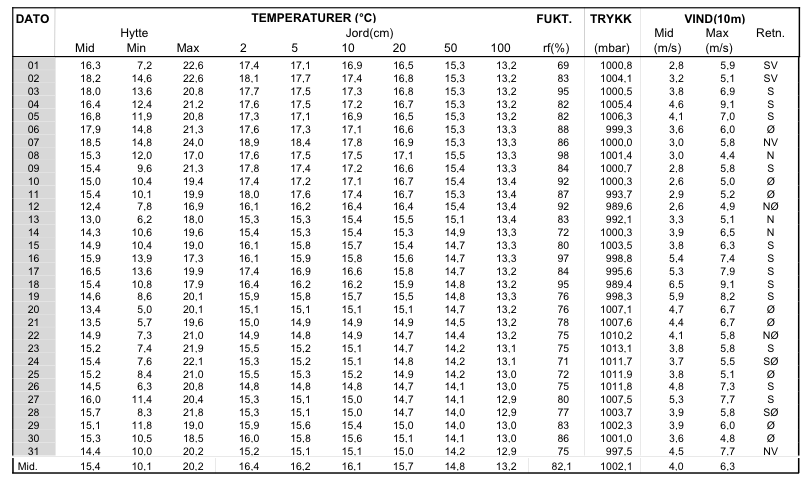

In [19]:
from IPython.display import Image ; Image(filename='Figures/metdataAug2013.png') # www.nmbu.no/fagklim

### Data tables in PyLab: *two-dimensional* arrays

- Created by creating and array from a list of lists
- Each of the interior lists becomes a row of the array
- All interior lists must have the same length (otherwise, and array will still be created, but it will behave differently)

In [20]:
array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [21]:
array([[1, 2], [3, 4], [5, 6]])

array([[1, 2],
       [3, 4],
       [5, 6]])

- We can find the number of rows and columns by looking at the `shape` field

In [22]:
a = array([[1, 2], [3, 4], [5, 6]])
print a
print a.shape

[[1 2]
 [3 4]
 [5 6]]
(3, 2)


- We se that `a` has three rows and two columns
- We can compute with two-dimensional arrays just as with one-dimensional ones

In [23]:
b = 3 * a + 2
print b

[[ 5  8]
 [11 14]
 [17 20]]


- Computations are done elementwise
- The result has the same shape as the original array
- This is also true for multiplication, we do **not** perform matrix-matrix multiplication
- **NB**: This is different from Matlab, where `a * a` is matrix-matrix multiplication, while `a .* a` is elementwise multiplication

In [24]:
print a * a

[[ 1  4]
 [ 9 16]
 [25 36]]


- When several arrays are combined in a mathematical expression, they must have the same shape.

### Indexing arrays

- We can access array elements as for mathematical matrices
- In Python, indices run from 0, not from 1
- The first index indicates the row, the second the column

In [25]:
print a 

[[1 2]
 [3 4]
 [5 6]]


In [26]:
print a[0, 0]

1


In [27]:
print a[1, 0]

3


In [28]:
print a[2, 1]

6


### Slicing of arrays

- One is often interested in picking out a subset of elements, eg a column
- This is called *slicing*

#### Slicing of one-dimensional arrays

- We define an array for illustration

In [29]:
a = linspace(10, 100, num=10)
print a

[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


- `a[m:n]` give us an array with elements
    - from and including index `m`
    - to but **excluding** index `n`
    - same logic as for `range()`: stop-index is not included
    - total number of elements selected: `n-m`

In [30]:
print a[2:4]

[ 30.  40.]


- `a[m:n:s]` gives us an array with elements
    - from and including index `m`
    - to but excluding index `n`
    - with **step** `s`
    - i.e. `a[m], a[m+s], a[m+2*s], ...`

In [31]:
print a[1:8:2]

[ 20.  40.  60.  80.]


- We can drop `m`, `n`, or both if we want to start from the first or go through the last element

In [32]:
print a[::2]

[ 10.  30.  50.  70.  90.]


### Arrays vs Lists

- NumPy arrays differ in several ways from Python lists, especially
    - arrays have fixed size
    - all entries in an array have the same data type (exceptions apply)
- This makes arrays much more efficient in time and space than lists

In [33]:
import math
import numpy

##### Array with 1.000.000 entries

In [34]:
lx = [x for x in range(0, 1000000)]
ax = array(lx)

In [35]:
%timeit sinlx = [math.sin(x) for x in lx]

10 loops, best of 3: 154 ms per loop


In [36]:
%timeit sinax = numpy.sin(ax)

10 loops, best of 3: 19.2 ms per loop


- NumPy is significantly faster than list comprehension
- This applies mainly when we apply NumPy functions to large arrays

####Arrays slices are view: An important difference from lists

- See also [Copies and Views Tutorial](http://scipy-lectures.github.io/intro/numpy/array_object.html#copies-and-views)
- Array slices are so-called *views*:
    - If `a` is a Numpy array, and `b = a[m:n:s]`, then `b` is a *view* of array `a`
    - `a` and `b` are distinct objects (i.e., `id(a) != id(b)`)
    - `a` and `b` are both of type `numpy.ndarray`
    - `a` and `b` ***share the same underlying data***: `b` just restricts what we see of the data in `a`
    - Therefore, any change to data in `b` also affects data in `a`

In [37]:
print a
b = a[:4]
b[0] = 1000
print a

[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]
[ 1000.    20.    30.    40.    50.    60.    70.    80.    90.   100.]


**Note**: 

- For a normal Python *list* `l`, `l[:]` is a *copy*  of the elements in `l`, i.e., a new list object, that can be manipulated without affecting `l`. 
- For an array `a`, `a[:]` is a *view* of `a` with the same underlying data as `a` and changing data through this view *will change* the data in `a`.

#### Slicing of two-dimensional arrays

- Same logic as for one-dimensional arrays
- We define an array for illustration

In [38]:
b = array([[11, 12, 13, 14], [21, 22, 23, 24], [31, 32, 33, 34]])
print b

[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]


- b[:, k] gives us the column with index `k`
- even though we choose a column, we it is displayed as a row: PyLab just sees it as a one-dimensional array

In [39]:
print b[:, 1]

[12 22 32]


- `b[r, :]` gives us the row with index `r`

In [40]:
print b[0, :]

[11 12 13 14]


- If we want several rows of columns, we proceed as for one-dimensional arrays
- We get at two-dimensional arrays as result

In [41]:
print b[:, :2]    # the first two columns

[[11 12]
 [21 22]
 [31 32]]


In [42]:
print b[:, ::2]   # every other column

[[11 13]
 [21 23]
 [31 33]]


- We can slice rows and columns simultaneously

In [43]:
print b[1:, ::2]

[[21 23]
 [31 33]]


### Plotting of functions

- We can use PyLab to plot mathematical functions
- Usual approach
    - define an array with `x`-values
    - compute the function (`y`-values)
    - use `plot()` to show the function

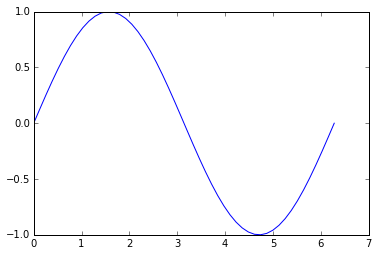

In [44]:
x = linspace(0, 2*pi)
y = sin(x)
plot(x, y);

- We can choose clolor, line style, etc
- By placing a semicolon after the last graphics command in a cell, we can avoid the `[<matplotlib.lines.Line2D at ....>]` line

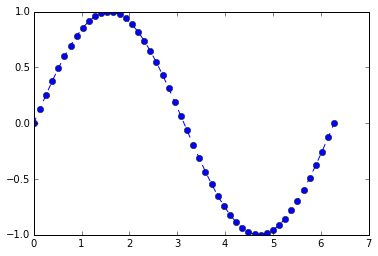

In [45]:
plot(x, y, 'o--');

- Using several `plot()` commands in a single cell, we can place several curves in a single figure
- `plot()` chooses the color automatically

- We can annotate lines using  `label` and `legend()` 

- We can also add axes label and a title

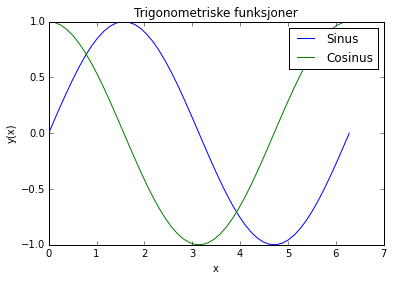

In [46]:
plot(x, y, label='Sinus');
plot(x, cos(x), label='Cosinus');
legend();
xlabel('x');
ylabel('y(x)');
title('Trigonometriske funksjoner');

* We can set limits for the values on an axis

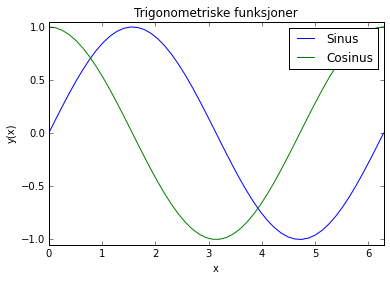

In [47]:
plot(x, y, label='Sinus');
plot(x, cos(x), label='Cosinus');
legend();
xlabel('x');
ylabel('y(x)');
title('Trigonometriske funksjoner');
xlim(0, 2*pi);
ylim(-1.05, 1.05);

- We can store graphics on disk in various formats
- Recommended formats
    - PDF: for most purposes
    - PNG: for use on websites or in software that does not accept PDF
- Do not use JPG for line graphics

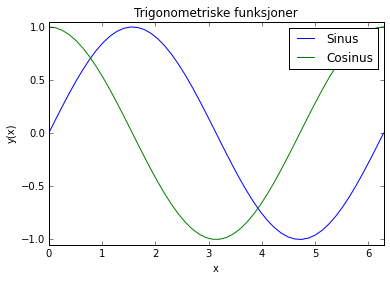

In [48]:
plot(x, y, label='Sinus');
plot(x, cos(x), label='Cosinus');
legend();
xlabel('x');
ylabel('y(x)');
title('Trigonometriske funksjoner');
xlim(0, 2*pi);
ylim(-1.05, 1.05);
savefig('sincos.pdf');   
savefig('sincos.png');

- The graphics files are stored in the same folder as the `.ipynb` files
- Order of commands:
    - `plot()` first
    - `savefig()` last
    - order of other commands does not matter much
    
**NB**: All plot-related commands are from the `matplotlib.pyplot` package and are automatically imported because we used `--pylab`. Without `--pylab`, we would have to write

    import matplotlib.pyplot as plt
    import numpy as np
    x = np.linspace(0, 2 * np.pi)
    plt.plot(x, np.sin(x), label='Sinus')
    plt.legend()
    plt.xlabel('x');

- We can use [$\LaTeX$](http://no.wikipedia.org/wiki/LaTeX) formatting for nicer figure labels
- Strings with $\LaTeX$ codes should be raw strings, so that backslashes cause no problems

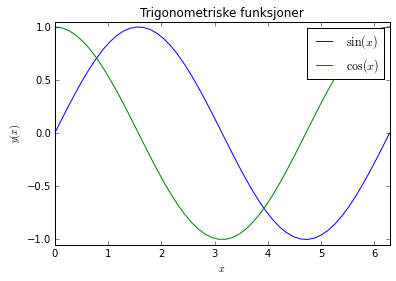

In [49]:
plot(x, y, label=r'$\sin(x)$');
plot(x, cos(x), label=r'$\cos(x)$');
legend();
xlabel('$x$');
ylabel('$y(x)$');
title('Trigonometriske funksjoner');
xlim(0, 2*pi);
ylim(-1.05, 1.05);

#### More about plotting
- Remeber that `plot?` and in general `<funksjonsnavn>?` show documentation
- All graphics functions in PyLab are documented [on this website](http://matplotlib.org/api/pyplot_api.html), e.g., [documentation for `plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)
- There is a [Matplotlib Tutorial](http://www.loria.fr/~rougier/teaching/matplotlib/) showing a number of other possibilities when plotting with Matplotlib
    - NB: I Tutorialen brukes `np.sin()`, `np.pi`, `np.linspace()` osv der vi bare har brukt `sin()`, `pi`, `linspace()` osv. Dette gjøres for å tydeliggjøre at man benytter funksjoner og konstanter som kommer fra NumPy. Så fremt man har startet  IPython med `--pylab` trenger man ikke `np.`.
    - Ved å klikke på grafikkene i Tutorialen, får dere se Python-koden som har lagt grafikken
    - Jeg anbefaler at dere kopierer koden inn i en tom celle i en IPython notebook
    - Dere trenger ikke ta med `from pylab import *` linjen i starten og `show()` linjen i slutten av koden

### Do not trust figures blindly, evaluate them critically!

#### What is wrong with this figure?

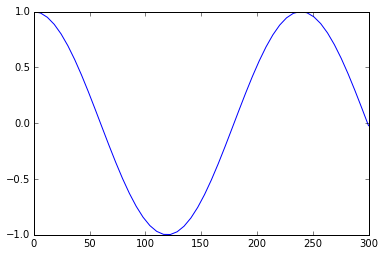

In [50]:
x = linspace(0, 300)
plot(x, cos(x), '-');

- Note the $x$-axis: it ranges from 0 to 300
- The figure thus cannot show the normal cosine, which has a period from $0$ to $2\pi$
- We plot the same function again, but with higher resolution along the $x$-axis

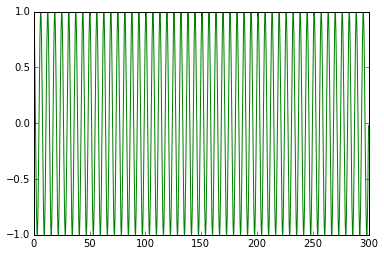

In [51]:
xh = linspace(0, 300, num=2000)
plot(xh, cos(xh), 'g-');

- We see that there are very many periods of the cosine (to be precise $300/(2\pi)\approx 48$)
- `linspace(0, 300)` has given us only 50 data points along the $x$-axis
- We have drawn only **a single data point per period** in the first figure
- To see this more clearly, we plot the cosine again with few and many points, but only up to 60

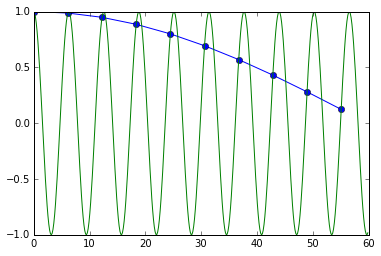

In [52]:
plot(x[x<60], cos(x[x<60]), 'bo-')
plot(xh[xh<60], cos(xh[xh<60]), 'g-');

- The green line shows the correct cosine function
- The blue dots show the data points we used for plotting the first figure
- The blue line connects the blue dots and is the line we saw in the first figure

#### Take-home message: Computers are eminently suited to generate nonsense---you have to use your critical mind!!!

* * *

## Visualization and analysis of data
    
### Data we will use
- Temperature and radiation data from [NMBU's weather station at Søråsfeltet](http://www.nmbu.no/fagklim/)
    - Basic Data: `Data til INF100 2003-2012.xlsx` in the `Data` folder
    - Thanks to Arne Auen Grimenes and Signe Kroken for the data!
    - The spreadsheet looks like this (one tab per year)

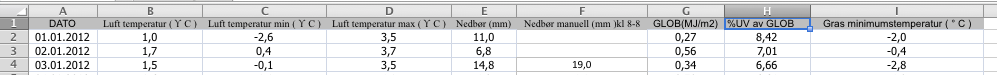

In [53]:
from IPython.display import Image ; Image(filename='Figures/INF100_F05_Excel.png')    

- Note the following
    - one row per day (24 hours)
    - the first row contains column headers
    - dates are given in continental European format
    - data is missing in some cells
    - numerical values are given with decimal *comma*
- Spreadsheets can be read directly (module `xlrd`), but we will skip that for now
- We store the spreadsheet as "csv" (*comma-separated values*) file and fix it, proceeding as follows
    1. Create a copy of the spreadsheet
    1. Delete all columns lacking data or unwanted for other reasons
    1. Save as csv-file
    1. Edit the csv-file in a text editor
        1. Add `#` to the beginning of the first line to make it a comment
        1. Use Find-Replace to replace all `,` with `.`
        1. Save the file
- I have prepared `weather_umb_2012.csv` this way
- The first few lines are

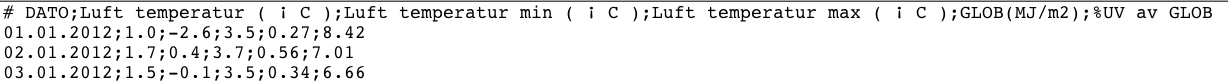

In [54]:
from IPython.display import Image ; Image(filename='Figures/INF100_F05_CSV.png')

### Reading data into Python

- We can read data from a text file using `loadtxt()` (from NumPy)

In [55]:
weather = loadtxt('Data/weather_umb_2012.csv', delimiter=';', 
                  usecols=(1, 2, 3, 4, 5))

- What does this line mean?
    - The first argument to `loadtxt()` is the name of the file to read
    - `delimiter=';'` tells `loadtxt()` that columns are separated by semicolon
    - `usecols=(1, 2, 3, 4, 5)` tells `loadtxt()` to read data from columns 1 to 5
        - Columns are enumerated from 0, i.e., we leave out the date column
    - The data are stored in an array called `weather`
    
- We can look at the size of `weather` and the data on the first few rows

In [56]:
weather.shape

(366, 5)

- 366 rows: data for 366 days (2012 was a leap year)
- 5 columns

In [57]:
weather[:3, :]

array([[ 1.  , -2.6 ,  3.5 ,  0.27,  8.42],
       [ 1.7 ,  0.4 ,  3.7 ,  0.56,  7.01],
       [ 1.5 , -0.1 ,  3.5 ,  0.34,  6.66]])

- A quick comparison with the spreadsheet above shows that the data have arrived correctly
- We create an array for the days, from 1 to 366

In [58]:
day = linspace(1, 366, num=366)

- We will show the daily minimal, average and maximum temperature
- We first assign the pertainign columns to meaningful names to make the code more readable
- We extract the lowest and highest temperatures throughout the year

In [59]:
T_avg = weather[:, 0]
T_min = weather[:, 1]
T_max = weather[:, 2]
print T_min.min()
print T_max.max()

-21.0
28.9


In [60]:
rcParams['figure.figsize'] = (12, 6)  # ensure largefigures

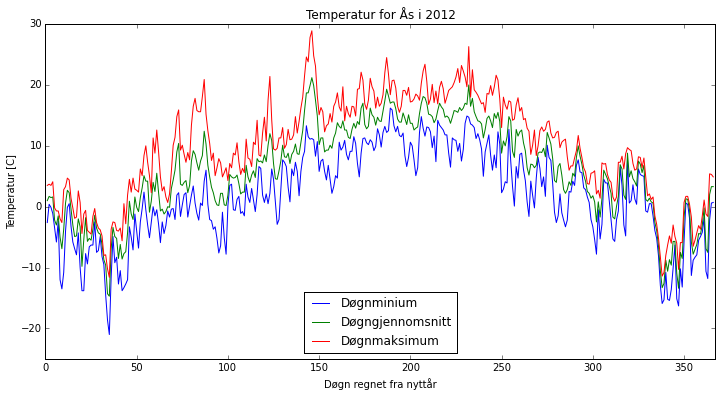

In [61]:
plot(day, T_min, '-', label=u'Døgnminium');
plot(day, T_avg, '-', label=u'Døgngjennomsnitt');
plot(day, T_max, '-', label=u'Døgnmaksimum');
xlabel(u'Døgn regnet fra nyttår');
ylabel(u'Temperatur [C]');
title(u'Temperatur for Ås i 2012');
xlim(0, 367);
ylim(-25, 30);
legend(loc='lower center');

#### Weekly average temperature

- We shall now look at the average temperature per week
- The first week begins Jan 1st, the second Jan 8th, etc
- We include only the 52 complete weeks and drop the last two days of the year
- We first need to create and array with one row per week and seven columns

In [62]:
T_avg_by_week = T_avg[:364].reshape(52, 7)

- What does that line do?
    - `T_avg[:364]` are the first 364 elementS in `T_avg` as one-dimensional array
    - `T_avg[:364].reshape(52, 7)` transforms this to a twodimensional array of 52 rows and 7 columns
- To check whether the rows contain the proper data, we compare

In [63]:
print T_avg[0:7]               # first seven days
print T_avg_by_week[0, :]      # first row

[ 1.   1.7  1.5  1.6 -2.2 -3.  -1.5]
[ 1.   1.7  1.5  1.6 -2.2 -3.  -1.5]


In [64]:
print T_avg[7:14]              # second seven days
print T_avg_by_week[1, :]      # second row

[-5.  -6.9 -3.7  0.6  2.7  2.3 -0.3]
[-5.  -6.9 -3.7  0.6  2.7  2.3 -0.3]


- Look good, so we proceed
- Compute the mean for each week (row)

In [65]:
T_avg_week_mean = T_avg_by_week.mean(axis=1)
len(T_avg_week_mean)

52

- `T_avg_by_weak.mean(axis=1)` computes the mean for each row
    - `axis=1` states that the mean is computed along axis 1, i.e., along the rows (or across the columns)
    - with `axis=0` we would have obtain the means along axis 0, i.e., down the columns (or across the rows)

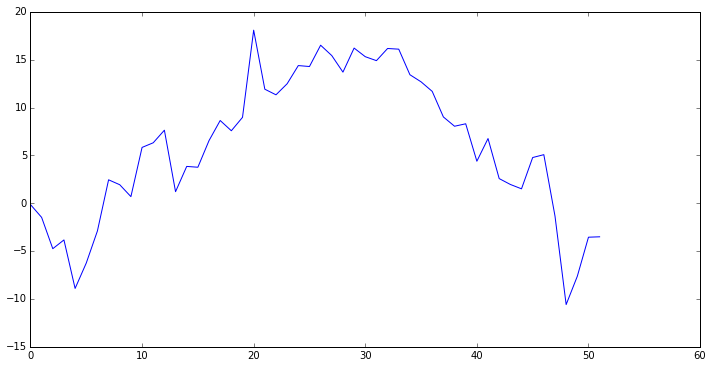

In [66]:
plot(T_avg_week_mean);

- We create an x-axis for the weekly data, choosing the midpoint in each week

In [67]:
x_week = 3.5 + 7 * linspace(0, 51, num=52)

- Now we can plot daily and weekly values in one graph

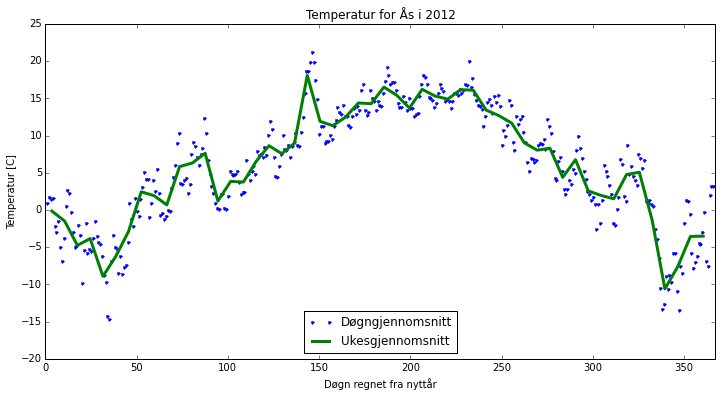

In [68]:
plot(day, T_avg, '.', label=u'Døgngjennomsnitt');
plot(x_week, T_avg_week_mean, '-', linewidth=3, label=u'Ukesgjennomsnitt');
xlabel(u'Døgn regnet fra nyttår');
ylabel(u'Temperatur [C]');
title(u'Temperatur for Ås i 2012');
xlim(0, 367);
ylim(-20, 25);
legend(loc='lower center');

### Solar irradiation

- We shall now look at solar irradiation, i.e., the energy received from the sunlight over a day, measured in MJ/m$^2$
- We consider the gobal irradiation, including UV, visible and infrared light

In [69]:
e_glob = weather[:, 3]
print e_glob.min(), e_glob.max()

0.18 27.72


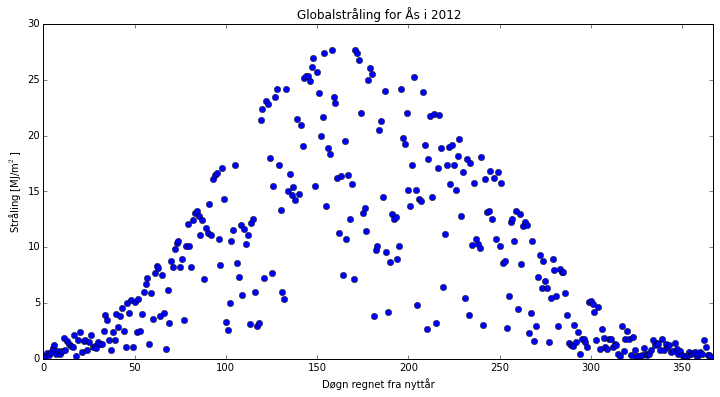

In [70]:
plot(day, e_glob, 'o');
xlabel(u'Døgn regnet fra nyttår');
ylabel(u'Stråling [MJ/m$^2$]');
title(u'Globalstråling for Ås i 2012');
xlim(0, 367);
ylim(0, 30);

#### Analysis of this figure

- The data has a very clear upper envelope
- Below the envelope, values vary much
- Hypothesis:
    - Periodic variation over the year due to the change in earth's position relative to the sun
    - Sine and cosine are the simplest periodic functions
    - Maximum around summer solistice, June 21st
    - Mathematical model
    $$E(d) = a + b \cos\frac{2\pi ( d - d_{max} )}{366}$$
    - where
        - $d$: day of the year
        - $d_{max}$: day of maximal irradiation ($\cos 0=1$)
    - from the figure above we can read of
        - $a\approx 14$
        - $b\approx 14$
    - June 21st is the 173rd day of the year:

In [71]:
d_max = array([31, 29, 31, 30, 31, 21]).sum()
print d_max

173


- Now we can compute the values for the model and display it together with the data

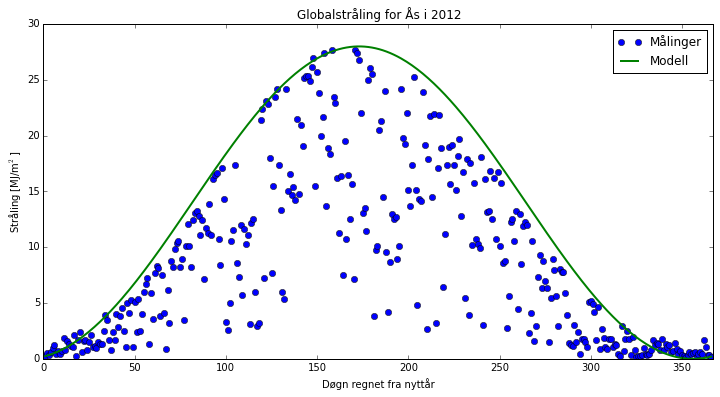

In [72]:
e_modell_max = 14 + 14 * cos(2 * pi * (day - d_max) / 366.)
plot(day, e_glob, 'o', label=u'Målinger');
plot(day, e_modell_max, '-', linewidth=2, label='Modell');
xlabel(u'Døgn regnet fra nyttår');
ylabel(u'Stråling [MJ/m$^2$]');
title(u'Globalstråling for Ås i 2012');
xlim(0, 367);
ylim(0, 30);
legend();

- Given the simplicity of the model, it fits surprisingly well
- Can we use the model also for a lower envelope to the data?
- We estimate from the figuren$a'\approx 2$, $b'\approx 2$ for the lower envelope

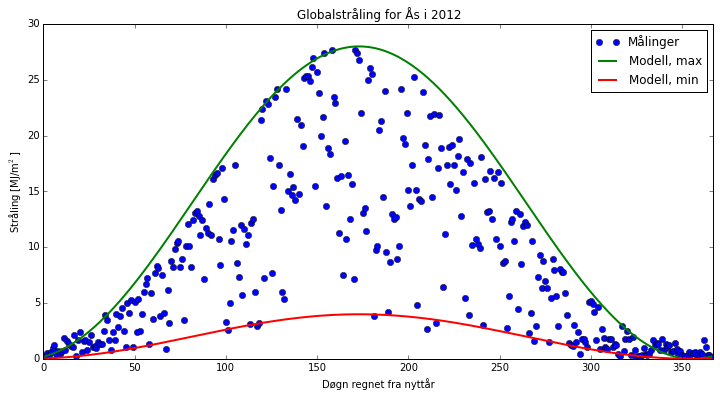

In [73]:
e_modell_max = 14 + 14 * cos(2 * pi * (day - d_max) / 366.)
e_modell_min =  2 +  2 * cos(2 * pi * (day - d_max) / 366.)
plot(day, e_glob, 'o', label=u'Målinger');
plot(day, e_modell_max, '-', linewidth=2, label='Modell, max');
plot(day, e_modell_min, '-', linewidth=2, label='Modell, min');
xlabel(u'Døgn regnet fra nyttår');
ylabel(u'Stråling [MJ/m$^2$]');
title(u'Globalstråling for Ås i 2012');
xlim(0, 367);
ylim(0, 30);
legend();

- This fits pretty well, too
- We can draw preliminary conclusions:
    - The annual variation in solar irradiation can be described by a sine function
    - A thick cloud cover reduces irradiation by a factor of seven, approximately
- We need to investigate these preliminary results further, e.g., by looking at several years, other measurements, thorough theoretical analysis, etc

### Correlation analysis: Temperature as function of irradiation

- We can now plot the average daily temperature as a function of irradiation

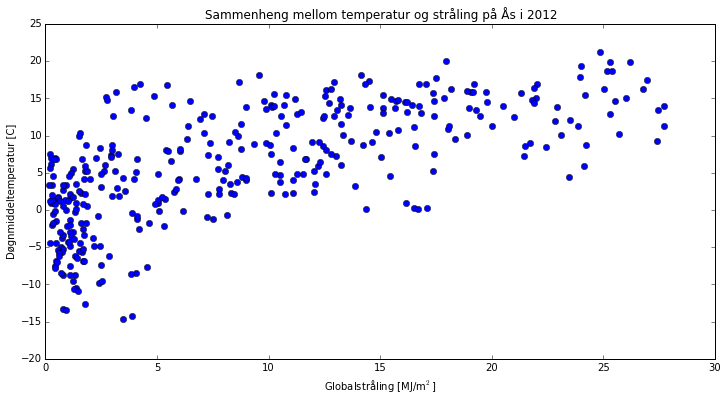

In [74]:
plot(e_glob, T_avg, 'o');
xlabel(u'Globalstråling [MJ/m$^2$]');
ylabel(u'Døgnmiddeltemperatur [C]');
title(u'Sammenheng mellom temperatur og stråling på Ås i 2012');
xlim(0, 30);
ylim(-20, 25);

- We see that the data points for irradiation $<5 \mathrm{MJ}/\mathrm{m}^2$ are more or less on a vertical line, indicating no correlation between irradiation and temperature for these data points
- For irradiation $>5 \mathrm{MJ}/\mathrm{m}^2$, data also vary, but we notice a weak correlation: temperature increases with irradiation
- We can split the data into points with hight and low irradiation on plot these in different colors
    - To this end, we use logic slicing: `e_glob[e_glob < 5]` are all `e_glob` lower than 5

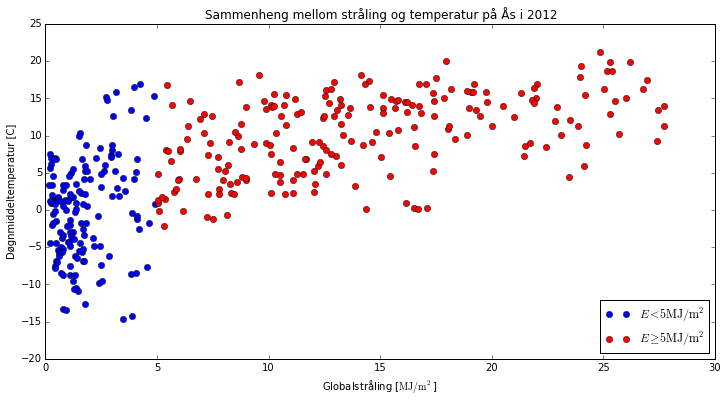

In [75]:
e_glob_low = e_glob[e_glob < 5]
e_glob_high = e_glob[e_glob >= 5]
T_avg_low = T_avg[e_glob < 5]
T_avg_high = T_avg[e_glob >= 5]

plot(e_glob_low, T_avg_low, 'bo', label=r'$E < 5\mathrm{MJ}/\mathrm{m}^2$');
plot(e_glob_high, T_avg_high, 'ro', label=r'$E \geq 5\mathrm{MJ}/\mathrm{m}^2$');
xlabel(u'Globalstråling [$\mathrm{MJ}/\mathrm{m}^2$]');
ylabel(u'Døgnmiddeltemperatur [C]');
title(u'Sammenheng mellom stråling og temperatur på Ås i 2012');
xlim(0, 30);
ylim(-20, 25);
legend(loc='lower right');

- We can now use linear regression to find the straight line best describing the red points
- We want to find the linear function

  $$T(E) = c E + d$$

  such that the quadratic error

  $$\Delta = \sum_{j} (T(E_j) - T_j)^2$$

  is minimized (*least-squares approximation). $E_j$ and $T_j$ are the irradiation and temperature values for the red data points.

In [76]:
c, d = polyfit(e_glob_high, T_avg_high, 1)
print "c = ", c
print "d = ", d

c =  0.441225003577
d =  3.97669048261


- About `polyfit(x_data, y_data, degree)`:
    - This finds the polynomial of given `degree` that results in the smallest error $\Delta$ between polynomial and data
    - We want a straight line, i.e., a polynomial of degree 1
    - `polyfit()` returns slope $c$ an y-offset $d$

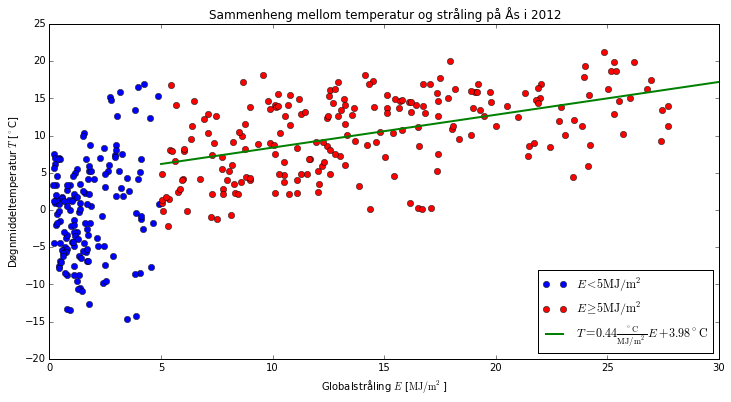

In [77]:
x_e = linspace(5, 30)
T_fit = c * x_e + d

plot(e_glob_low, T_avg_low, 'bo', label=r'$E < 5\mathrm{MJ}/\mathrm{m}^2$');
plot(e_glob_high, T_avg_high, 'ro', label=r'$E \geq 5\mathrm{MJ}/\mathrm{m}^2$');
plot(x_e, T_fit, 'g-', linewidth=2, label=r'$T = 0.44\frac{^\circ\mathrm{C}}{\mathrm{MJ}/\mathrm{m}^2} E + 3.98 ^\circ\mathrm{C}$');
xlabel(u'Globalstråling $E$ [$\mathrm{MJ}/\mathrm{m}^2$]');
ylabel(u'Døgnmiddeltemperatur $T$ [$^\circ$C]');
title(u'Sammenheng mellom temperatur og stråling på Ås i 2012');
xlim(0, 30);
ylim(-20, 25);
legend(loc='lower right');

- The green line is drawn only for $E\geq 5$ because we used just the red points for fitting
- We see a rough correlation between temperature and irradiation: during the warmer part of the year, temperature increases by $0.44 \frac{^\circ\mathrm{C}}{\mathrm{MJ}/\mathrm{m}^2}$, i.e., by slightly less than a half Kelvin per Megajoule irradiation per square meter.
- See statistics textbooks for a discussion of the reliability of this estimate.

## Plots illustrating the bisection method

This section introduces a plotting function that allows us to create illustrative plots of the bisection method for finding a solution to the equation

$$
f(x) = c
$$

in the interval $[a, b]$, assuming that the equation has exactly one solution in that interval.

**NB**: 

- In practice, complicated functions such as `bisect_plot` would not be defined in the Notebook, but rather in Python modules (`.py` files), which one then imports to the notebook
- When `import`ing, Python will look in the folder in which you started IPython, plus any folders in the `PYTHONPATH`. You can see the path with the following command

    import sys
    print sys.path
    
- You can add directories by appending to the `sys.path` list.

In [78]:
def bisect_plot(func, const, a=None, b=None, xmin=None, xmax=None, lower=None, left=None):
    """Illustrende grafikk for biseksjon i [a, b]."""
    
    # evaluate the function across the entire plotting interval
    x = linspace(xmin, xmax)
    y = func(x)
    
    # draw function and constant
    plot(x, y, '-', lw=3)
    plot([xmin, xmax], [const, const], '-', lw=3)
    
    # set x-limits, find y-limits
    xlim(xmin, xmax)
    ymin, ymax = gca().get_ylim()
    
    # do not proceed if any argument necessary for pretty-plotting i missing
    if any([arg is None for arg in (a, b, lower, left)]):
        return
        
    # midpoint
    m = (a + b) / 2.
    
    # array with x-values just for the half-interval containing the intersection
    if (func(a)-const) * (func(m)-const) < 0:
        x_next = linspace(a, m)
    else:
        x_next = linspace(m, b)
    y_next = func(x_next)
    
    # fill the area below the curve in the half-interval containing the intersection
    fill_between(x_next, y_next, ymin, color=(0.8, 1.0, 0.8))
    
    # draw dashed lines at a, m, b and f(a), f(m), f(b)
    for val, lbl in ((a, 'a'), (m, 'm'), (b, 'b')):
        plot([val, val, xmin], [ymin, func(val), func(val)], 'k--', lw=3)
        text(val, ymin-lower, '${}$'.format(lbl), fontsize=20,
             horizontalalignment='center',
             verticalalignment='top')
        text(xmin-left, func(val), '${}({})$'.format(func.__name__, lbl), fontsize=20,
             horizontalalignment='right',
             verticalalignment='center')
        text(xmin-left, const, '$c$'.format(lbl), fontsize=20,
             horizontalalignment='right',
             verticalalignment='center')
        
    # we need to reset the vertical limits, text() has changed them
    ylim(ymin, ymax)

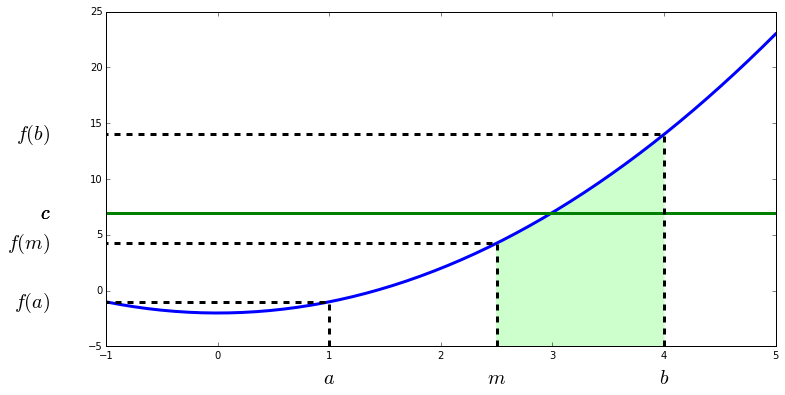

In [79]:
def f(x):
    return x**2 - 2

bisect_plot(func=f, const=7, a=1, b=4, xmin=-1, xmax=5, lower=2, left=0.5)

- Proceed into green interval

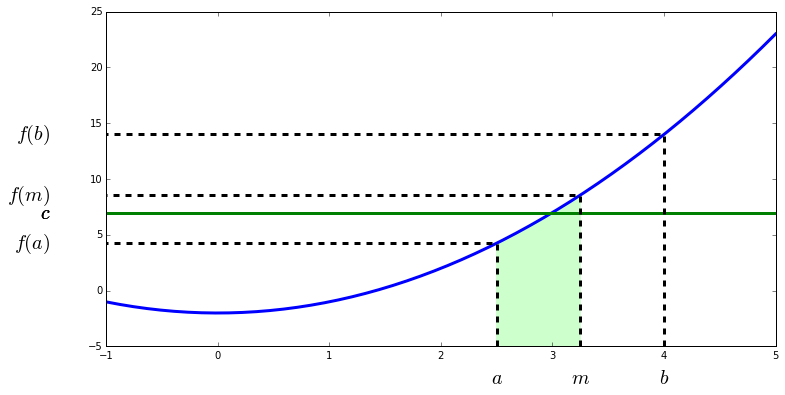

In [80]:
bisect_plot(func=f, const=7, a=2.5, b=4, xmin=-1, xmax=5, lower=2, left=0.5)

- Repeat until $f(m)$ is small enough

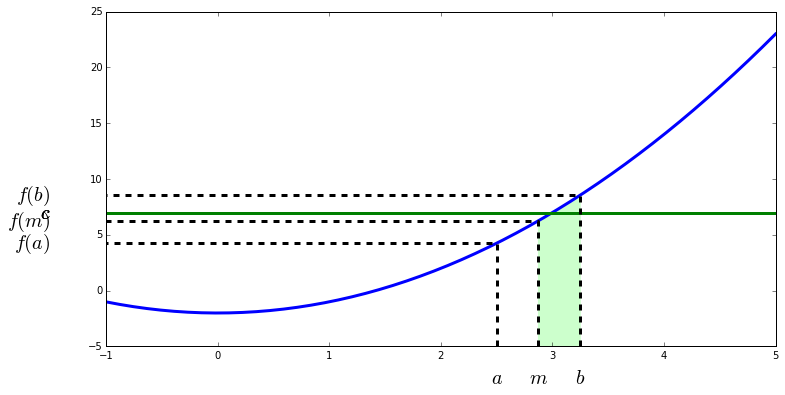

In [81]:
bisect_plot(func=f, const=7, a=2.5, b=3.25, xmin=-1, xmax=5, lower=2, left=0.5)

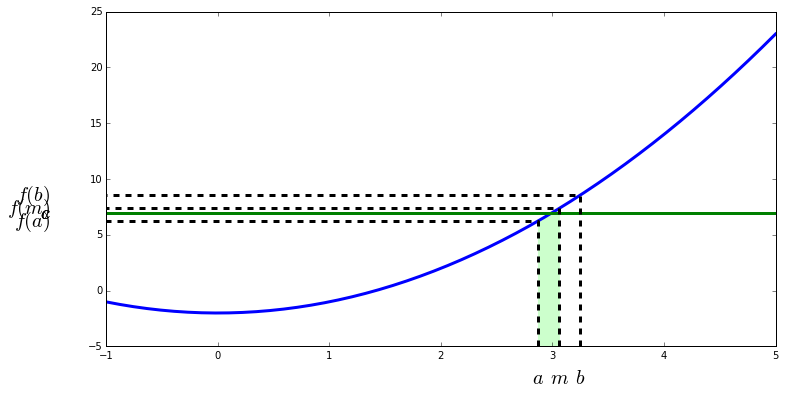

In [82]:
bisect_plot(func=f, const=7, a=2.875, b=3.25, xmin=-1, xmax=5, lower=2, left=0.5)

## Chutes & Ladders as a Markov Process


### Background

The movement of the walker is a [Markov process](https://en.wikipedia.org/wiki/Markov_process), because the result of a single move depends only on the current position $j$ of the walker and the roll of the die. The entire history, i.e., *how* the walker got to position $j$ does not matter. Such processes are highly relevant in many branches of science and technology. One example of their use in neuroscience is in my PhD thesis ([Plesser, 1999](http://arken.umb.no/~plesser/publications/HEPlesser_PhD.pdf)). We can use techniques for Markov processes to study the movement of the walker in the Chutes & Ladders game.

Instead of obtaining the distribution of times to goal using simulation, we can also obtain it by numerical computation (or, using, e.g. SymPy, even exact). Let ${p^{(k)}}$ be a vector with elements $p^{(k)}_j$ ($0\leq j \leq G$) representing the probability probability that the walker is at position $j$ after move $k$. As initial conditions, we have
\begin{align}
p^{(k)}_0 &= 1\\
p^{(k)}_j &= 0\quad\mathrm{for}\; j>0
\end{align}
Let $M$ be a matrix that describes the how a single move changes the probabilities for the location of the walker. Specifically, let $M_{ij}$ be the probability that a walker in position $j$ will move to position $i$ in the next move. 
Let us first consider a game without chutes and ladders. The walker will then with equal probability move to one of the next six positions, except for the last few positions on the board, where any move will stop at $G$. We therefore have
\begin{align}
M_{0j} &= 0 \qquad\mathrm{(can\,never\,return\,to\,0)} \\
M_{ij} &= 1/6 \quad\mathrm{for}\; j+1\leq i \leq j+6 \;\mathrm{and}\; i < G\\
M_{Gj} &= 0 \quad\mathrm{for}\; j < G-6 \\
M_{Gj} &= 1 - (G-j-1)/6 \quad\mathrm{for}\; G-6 \leq j < G \\
M_{GG} &= 1\\
M_{ij} &= 0 \quad\mathrm{else}
\end{align}

We can then describe the motion of the walker across the board by the following equation:

\begin{equation}
p^{(k+1)} = M \times p^{(k)} \;.
\end{equation}

To obtain the probability distribution for the time to arrive at the goal $G$, we consider $p^{(k)}_G$, which corresponds to the probability that the walker has reached the goal after at most $k$ moves. If $G=6n$, then the goal can at the earliest be reached after $n$ moves (all sixes, probability $(1/6)^n$), and must at the latest be reached after $G$ moves ($G$ ones, probability $(1/6)^G$), i.e.,

\begin{align}
p^{(k)}_G &= 0 \quad\mathrm{for}\; k < n \\
p^{(n)}_G &= (1/6)^n \\
p^{(G)}_G &= 1
\end{align}

These cases provide test cases. Note that $Q_k=p^{(k)}_G$ is the *cumulative*  probability of arrival by step $k$. The probability for arriving *at* step $k$ is 
$$q_k = Q_k - Q_{k-1}\;.$$

Let us now assume that we have a ladder from $r$ to $s$ (chutes work the same way). Then the probability for the walker to move to $r$ will be $0$, and the corresponding probability will be "moved" to $s$. Specifically, based on matrix $M$ from above, we can defined matrix $L$ as follows:
\begin{align}
L_{rj} &= 0 \quad \forall j \qquad\mathrm{(no\,moves\,to\,r)}\\
L_{sj} &= M_{sj} + M_{rj}\quad \forall j \qquad\mathrm{(moves\,to\,s\,instead\,of\,r)}\\
L_{ij} &= M_{ij}\quad\mathrm{else}
\end{align}

### Implementation

In [83]:
import numpy as np

We defined $p$ as an array with one column per time point we are interested in, and one row per position. We add some extra columns to ensure all is stationary after $G$ steps and to avoid confusion about which matrix dimension is what.

In [84]:
p = np.zeros((91, 100))
p[0, 0] = 1

In [85]:
M = np.zeros((91, 91))
M[90, 90] = 1
M[90, 84:90] = np.array([1., 2., 3., 4., 5., 6.]) / 6.
for i in range(1, 90):
    M[i, max(0, i-6):i] = 1./6.

In [86]:
for k in range(1, 100):
    p[:, k] = np.dot(M, p[:, k-1])

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 120          
plt.rcParams['figure.figsize'] = (12., 6.)

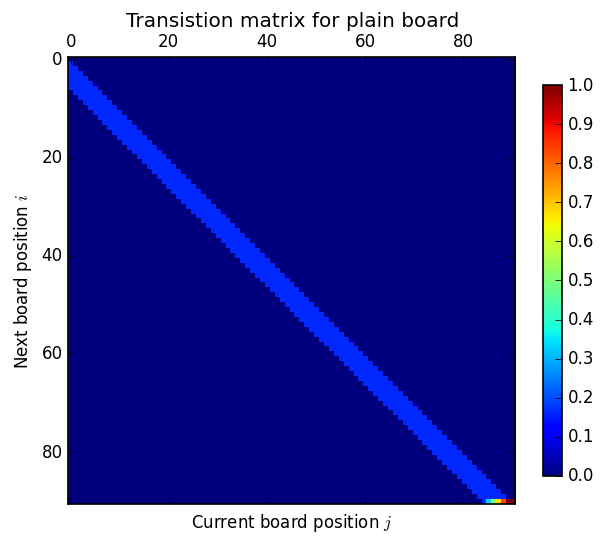

In [88]:
plt.matshow(M);
plt.xlabel('Current board position $j$');
plt.ylabel('Next board position $i$');
plt.title('Transistion matrix for plain board');
ax = plt.colorbar(shrink=0.7);

- The broad band slighly below the diagonal represents normal moves.
- Accumulation of probability in position $G=90$ is visible in the bottom right corner.

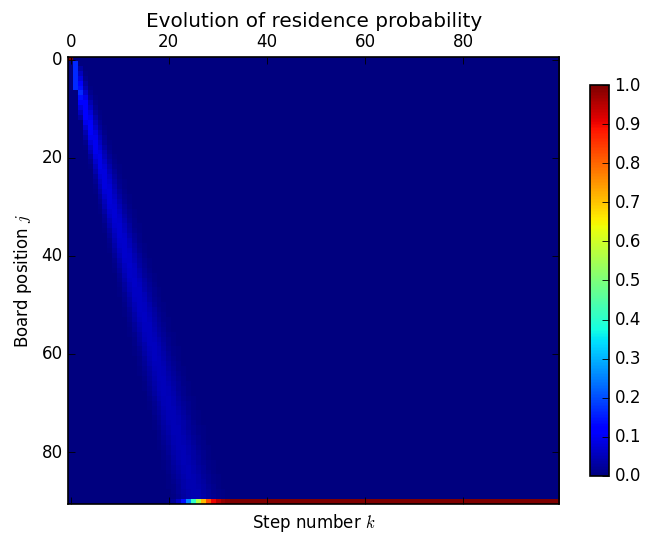

In [89]:
plt.matshow(p)
plt.xlabel('Step number $k$');
plt.ylabel('Board position $j$');
plt.title('Evolution of residence probability');
ax = plt.colorbar(shrink=0.7);

In [90]:
Q = p[90, :]
q = np.zeros_like(Q)   # fiddle a little to avoid zero-indexing trouble
q[1:] = np.diff(Q)

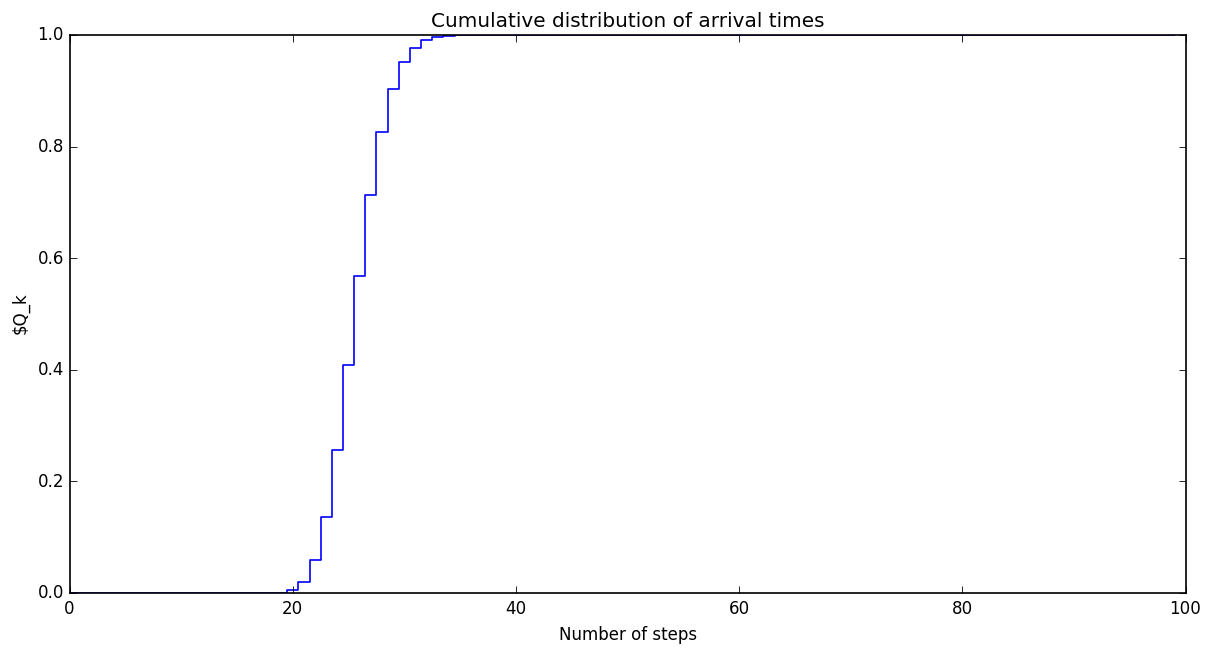

In [91]:
plt.step(range(100), Q, where='mid');
plt.title('Cumulative distribution of arrival times')
plt.xlabel('Number of steps');
plt.ylabel('$Q_k');

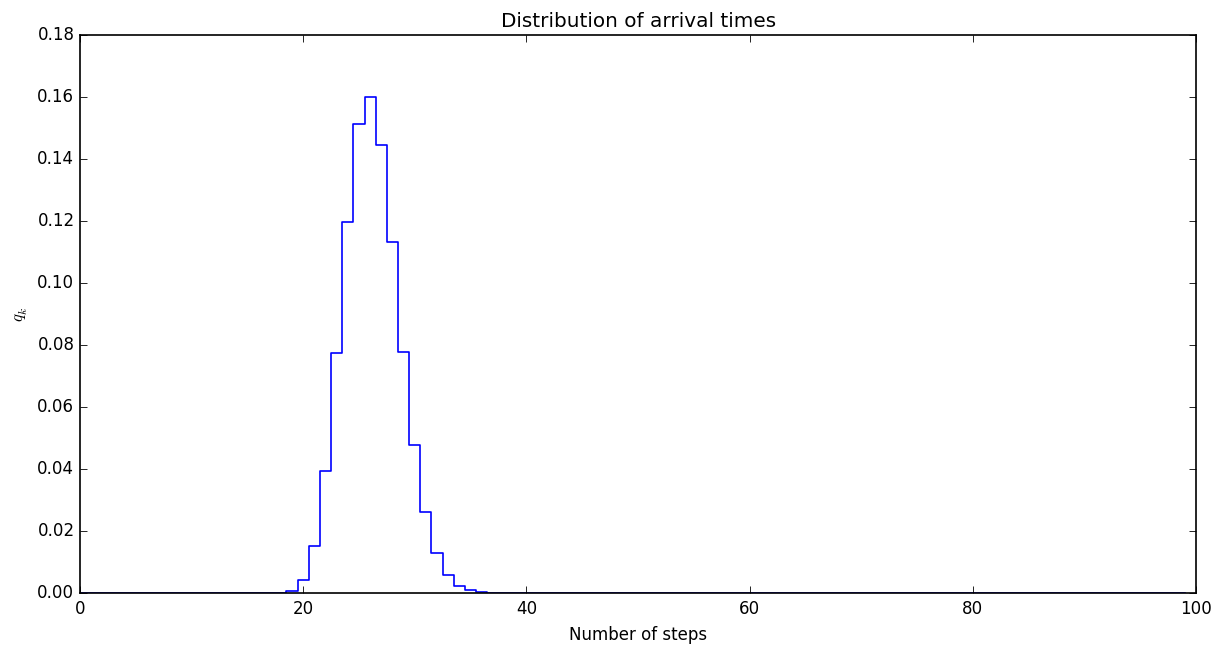

In [92]:
plt.step(range(100), q, where='mid');
plt.title('Distribution of arrival times')
plt.xlabel('Number of steps');
plt.ylabel('$q_k$');

Let's check the border cases

In [93]:
print Q[14], Q[15], (1./6.)**15, Q[15]-(1./6.)**15

0.0 2.12682249073e-12 2.12682249073e-12 0.0


In [94]:
print q[15]

2.12682249073e-12


In [95]:
print q[90]

0.0


In [96]:
print Q[89]-1, Q[90]-1

-1.66533453694e-15 -1.66533453694e-15


In [97]:
print (1./6.)**90

9.25523532087e-71


Okay, probabilities for long game durations are far below numerical precision, therefore we do not see exact values in the tail of the distribution. But the error of $\mathcal{O}(10^{-15})$ is acceptable.

#### Matrix with chutes and ladders

We first define the standard set of chutes and ladders.

In [98]:
cnl = [(1, 40), (8, 10), (36, 52), (43, 62), (49, 79), (65, 82), (68, 85)] + \
      [(24, 5), (33, 3), (42, 30), (56, 37), (64, 27), (74, 12), (87, 70)]

In [99]:
L = M.copy()
for start, dest in cnl:
    L[start, :] = 0.
    L[dest, :] += M[start, :]

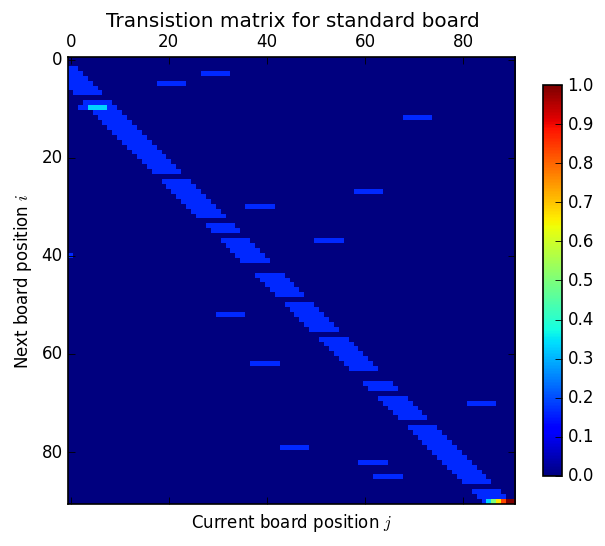

In [100]:
plt.matshow(L);
plt.xlabel('Current board position $j$');
plt.ylabel('Next board position $i$');
plt.title('Transistion matrix for standard board');
ax = plt.colorbar(shrink=0.7);

- The broad band slighly below the diagonal represents normal moves.
- Stripes above the diagonal represent chutes.
- Stripes below the broad band represent ladders.
- The bright blue bar in the top-left corner is the $8\to 10$ ladder which is so short it overlaps with normal movement.
- The $1\to 40$ ladder is visible as a single bright blue pixel on row 40.
- Accumulation of probability in position $G=90$ is visible in the bottom right corner.

In [101]:
pL = np.zeros((91, 300))
pL[0, 0] = 1
for k in range(1, pL.shape[1]):
    pL[:, k] = np.dot(L, pL[:, k-1])

In [102]:
QL = pL[90]
qL = np.zeros_like(QL)
qL[1:] = np.diff(QL)

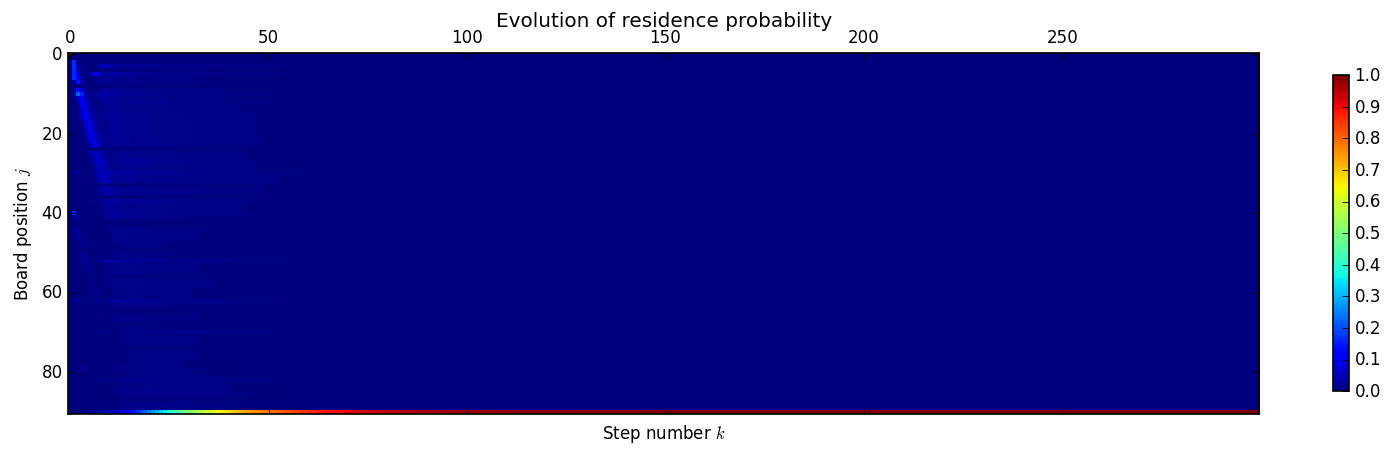

In [103]:
plt.matshow(pL);
plt.xlabel('Step number $k$');
plt.ylabel('Board position $j$');
plt.title('Evolution of residence probability');
ax = plt.colorbar(shrink=0.7);

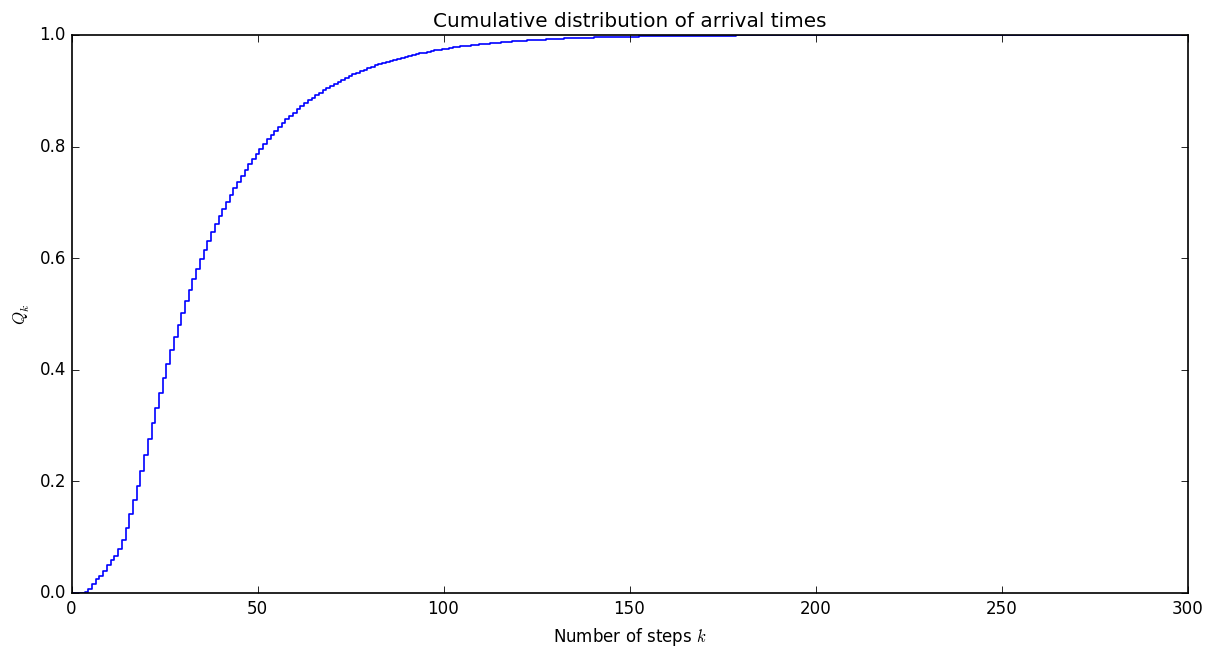

In [104]:
plt.step(range(len(QL)), QL, where='mid');
plt.title('Cumulative distribution of arrival times')
plt.xlabel('Number of steps $k$');
plt.ylabel('$Q_k$');

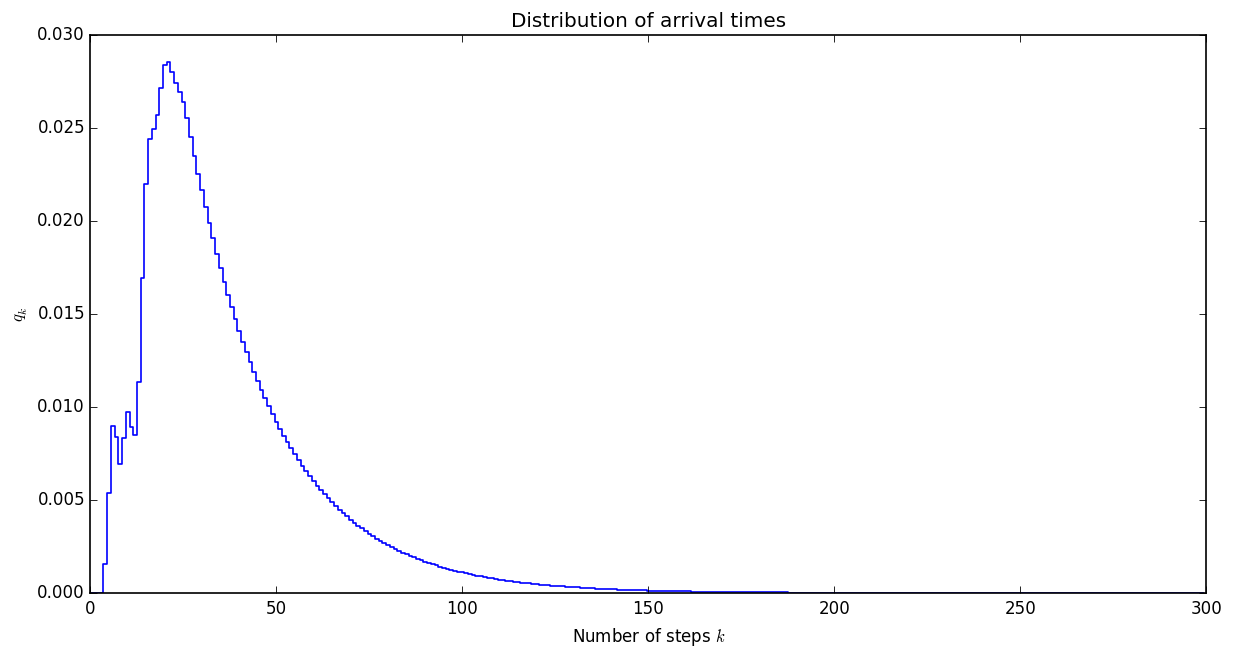

In [105]:
plt.step(range(len(qL)), qL, where='mid');
plt.title('Distribution of arrival times')
plt.xlabel('Number of steps $k$');
plt.ylabel('$q_k$');

We know that the shortest path is 4 steps, requiring a precise sequence of die casts, i.e., it has probability $6^{-4}$. We can check this:

In [106]:
print "No one should make it in three moves                   :", qL[3]
print "It is possible to make it in four moves                :", qL[4]
print "If there is a single way to do it four moves, we expect:", (1./6.)**4
print "If there are two ways to do it in four moves, we expect:", 2 * (1./6.)**4
print "Difference between results and two-ways expectation    :", qL[4] - 2 * (1./6.)**4

No one should make it in three moves                   : 0.0
It is possible to make it in four moves                : 0.00154320987654
If there is a single way to do it four moves, we expect: 0.000771604938272
If there are two ways to do it in four moves, we expect: 0.00154320987654
Difference between results and two-ways expectation    : 2.16840434497e-19


So apparently there are two ways to do it in four steps. Inspection of the board reveals the following possibilities:

1. Roll 1, then take ladder from 1 to 40.
1. Roll 3, then take ladder from 43 to 62.
1. Roll 6, then take ladder from 68 to 85.
1. From 85, you can reach 90 by either rolling 5 or 6.

Therefore, there are indeed exactly two ways of reaching the goal with four moves.

Furthermore, we can check that $Q_k\to 1$ for $k\to\infty$:

In [107]:
print 1 - QL[-1]

5.44515940026e-06


This indicates convergence to $1$, but at the same time a rather long tail. We can plot semilogarithmically to see the tail better:

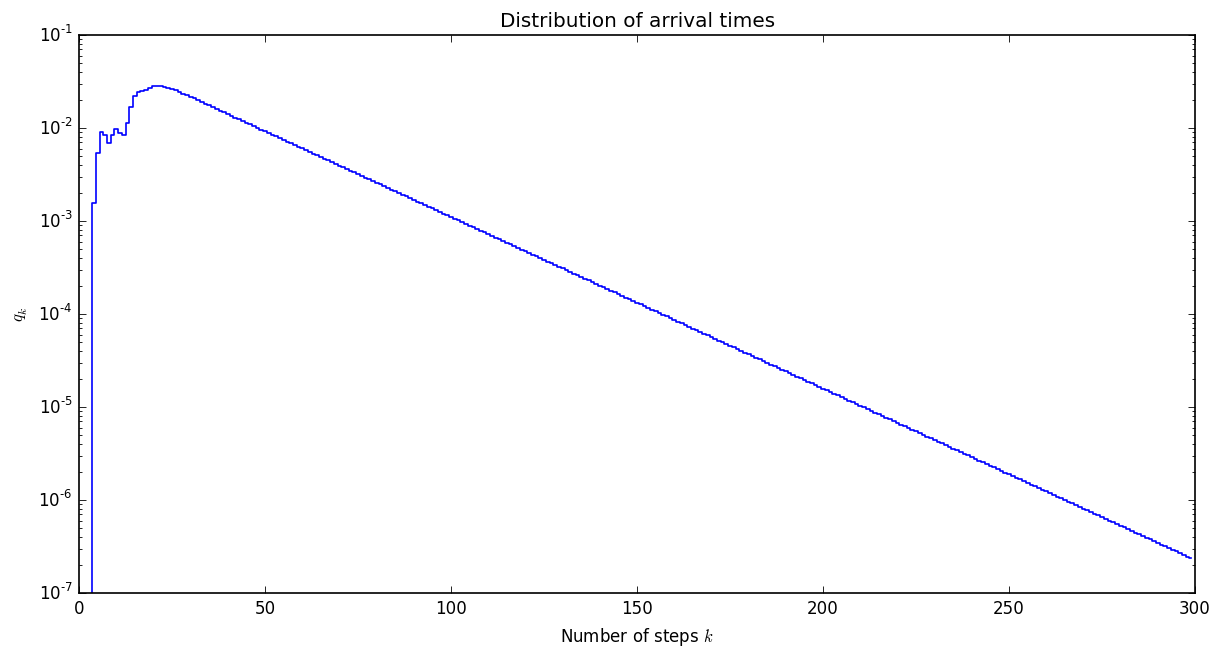

In [108]:
plt.step(range(len(qL)), qL, where='mid');
plt.yscale('log')
plt.title('Distribution of arrival times')
plt.xlabel('Number of steps $k$');
plt.ylabel('$q_k$');

The tail of the distribution is linear in the semilogarithmic plot, indicating that it follows an exponential distribution. For more detailed characterization, we could fit the distribution for $k>50$ to an exponential distribution; we leave this as an exercise.

#### Comparison with simulation

In [109]:
import sys
sys.path.insert(0, '../../Exercises/pa02/')
from chutes_simulation import Simulation, Player

In [110]:
sim = Simulation([Player], seed=1234567)
sim.run_simulation(10000)

In [111]:
d = sim.durations_per_type()[Player]
qE = np.zeros(max(d)+1, dtype=float)
for n in frozenset(d):
    qE[n] = d.count(n)
qE /= len(d)

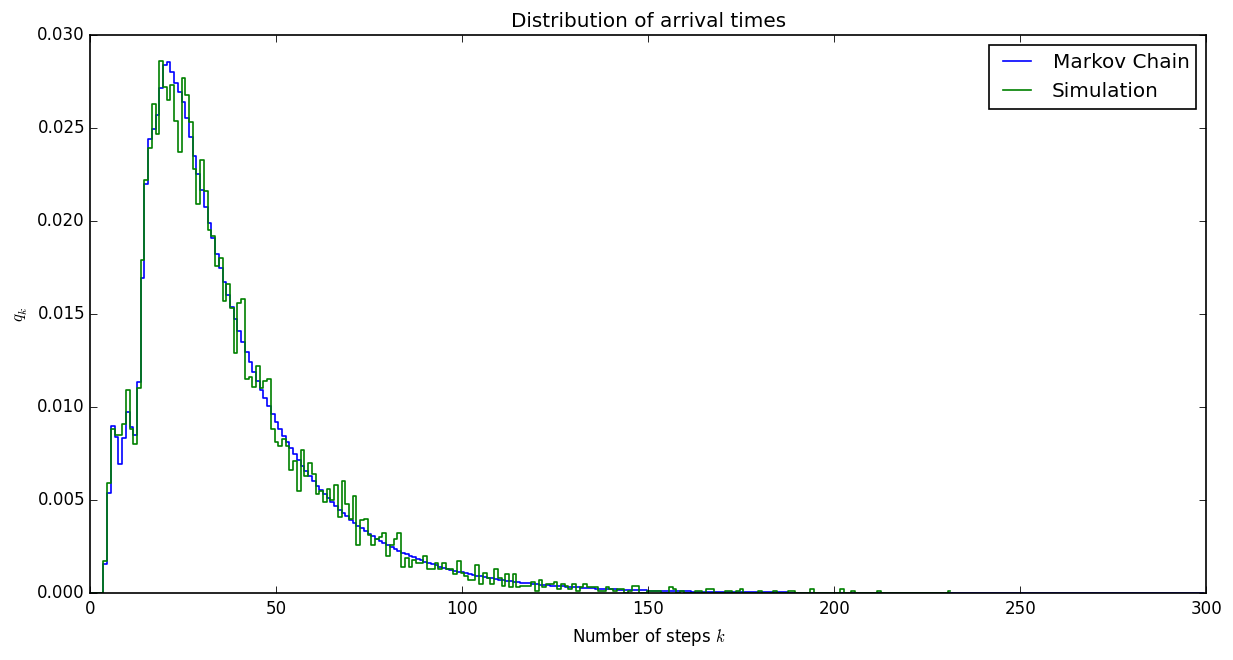

In [112]:
plt.step(range(len(qL)), qL, where='mid', label='Markov Chain');
plt.step(range(len(qE)), qE, where='mid', label='Simulation');
plt.title('Distribution of arrival times')
plt.xlabel('Number of steps $k$');
plt.ylabel('$q_k$');
plt.legend();

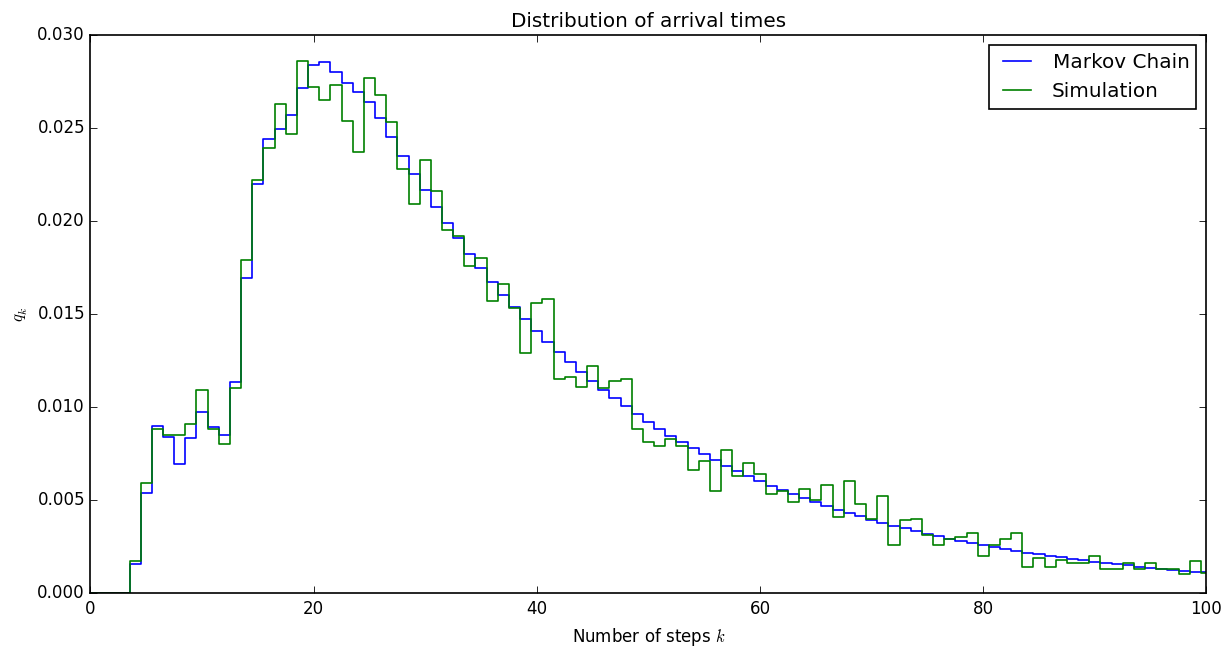

In [113]:
plt.step(range(len(qL)), qL, where='mid', label='Markov Chain');
plt.step(range(len(qE)), qE, where='mid', label='Simulation');
plt.title('Distribution of arrival times')
plt.xlabel('Number of steps $k$');
plt.ylabel('$q_k$')
plt.xlim(0, 100)
plt.legend();

Markov chain analysis and simulation are apparently in good agreement. This qualitative statement based on visual inspection (which may be misleading) should be substantiated by a proper statistical test, cf *Extensions* below.

#### Games with multiple players

In order to find the distribution of the arrival time for the first of $N$ (identical) players in a game, we can use results from [order statistics](http://en.wikipedia.org/wiki/Order_statistic). If $T_n$ is the random variable representing the arrival time of walker $n$, then we are interested in the distribution of $\min \{T_1, T_2, ..., T_N\}$, where all $T_n$ are independently and identically distributed according to the discrete distribution $q_k$. From [David and Nagaraja (1992, Eq 2.1.3)](http://books.google.no/books?id=bdhzFXg6xFkC&dq=Arnold,+B.+C.,+N.+Balakrishnan,+H.+N.+Nagaraja.+1992.+A+First+Course+in+Order+Statistics.+Wiley,+New+York.&hl=no&source=gbs_navlinks_s), we obtain the cumulative distribution of the minimum of $N$ random variables i.i.d. with cumulative distribution $Q_k$ as
$$R^{(N)}_k = 1 - ( 1 - Q_k )^N$$
and the corresponding distribution as
$$r^{(N)}_k = R^{(N)}_k - R^{(N)}_{k-1}\;.$$
See also [Evans et al (2006)](http://www.math.wm.edu/~leemis/2006informsjoc.pdf).

We consider a game with four players.

In [114]:
N = 4
RL = 1 - (1 - QL)**N
rL = np.zeros_like(RL)   # fiddle a little to avoid zero-indexing trouble
rL[1:] = np.diff(RL)

In [115]:
simN = Simulation([Player] * N, seed=1234567)
simN.run_simulation(10000)

In [116]:
dN = simN.durations_per_type()[Player]
rE = np.zeros(max(dN)+1, dtype=float)
for n in frozenset(dN):
    rE[n] = dN.count(n)
rE /= len(dN)

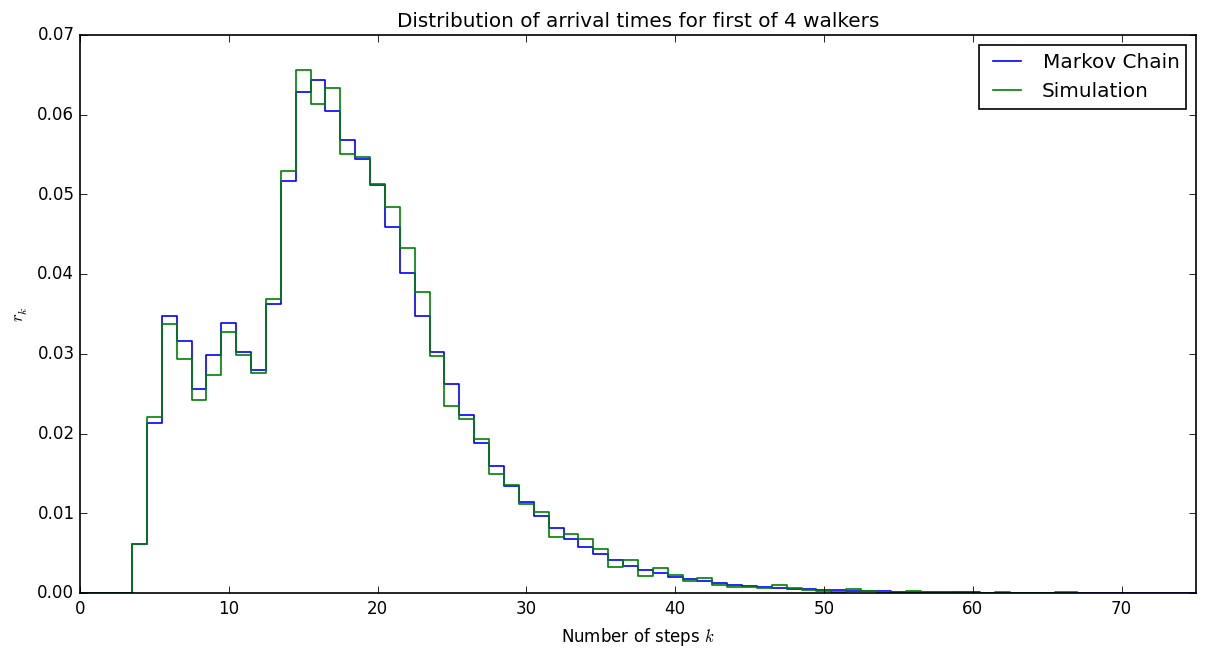

In [117]:
plt.step(range(len(rL)), rL, where='mid', label='Markov Chain');
plt.step(range(len(rE)), rE, where='mid', label='Simulation');
plt.title('Distribution of arrival times for first of {:d} walkers'.format(N))
plt.xlabel('Number of steps $k$');
plt.ylabel('$r_k$');
plt.legend();
plt.xlim(0, 75);

Also in this case theory and simulation appear to agree very well; see *Extensions* below for a note on statistical tests for distributions. As a sanity check, we check that no-one arrived in fewer than four moves, and that $R_k^{(4)}\to1$ for $k\to\infty$:

In [118]:
print RL[3], RL[4]
print 1 - RL[-1]

0.0 0.00615856522076
0.0


### Extensions

#### Statistical tests for distributions
Above, we compared distributions obtained numerically by Markov chain analysis with distributions obtained from simulations by visual inspection. While this is a useful first step (*always* look at your data before applying statistical analysis!), it may also be misleading. To draw solid conclusions, we need to apply statistical tests to check whether the simulation results follow the distribution obtained from Markov chain analysis.

For continuous random variables, e.g., variables following a Gaussian or exponential distribution, the proper test is the [Kolmogorov-Smirnov test](http://itl.nist.gov/div898/handbook/eda/section3/eda35g.htm), which is available as [`scipy.stats.kstest`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html).

The distribution of game durations, though, is a discrete distribution and we need to apply the [$\chi^2$-test](http://itl.nist.gov/div898/handbook/eda/section3/eda35f.htm), which is available as [`scipy.stats.chisquare`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html). In this test, we compare the number of times each game duration has been observed with the number predicted, $n_k=q_k\times N$, where $N$ is then number of games played. To be valid, the $\chi^2$-test requires that $n_k >5\; \forall k$. In order to ensure that this is fulfilled, we proceed as follows:

1. Find $k_{\mathrm{max}}$, the game duration for with highest probability $q_k$. The distribution for $k>k_{\mathrm{max}}$ is essentially the tail of the distribution, while the part $k<k_{\mathrm{max}}$ is the interesting part.
1. Find $k_{\mathrm{min}} < k_{\mathrm{max}}$, the game duration for which $q_k$ is smallest (but non-zero), to the left of the maximum.
1. Choose $N$ so that $N\times q_{k_{\mathrm{min}}}>5$.
1. Find $k_{\mathrm{tail}}$ as the largest $k$ for which both of the following conditions are fulfilled:

    1. $N\times q_k>5$
    1. $(1-Q_k)\times N>5$

   Condition A. ensures that the expectation for the rightmost bin, $k_{\mathrm{tail}}$ is more than 5, while B. ensures that the remaining tail, which we will collapse into a single bin, also has an expectation of at least 5.
1. Simulate $N$ games.
1. Each game duration $k$ forms one *bin* for the $\chi^2$-test, except that all game durations $k>k_{\mathrm{tail}}$ are combined in a single bin. The expectation for this bin is $n_{\mathrm{tail}}=(1-Q_{k_\mathrm{tail}})\times N$.
1. Apply the $\chi^2$-test to the data.

#### Modeling players with internal state
In order to treat players with internal state, such as resilient players (take extra step(s) after sliding down) or lazy players (take fewer step(s) after climbing up), we need to split every element of vector $p$ into two: one representing the probability of being in normal, and on of being in special mode at a given location. Matrices $M$ and $L$ then have twice as many rows and columns and become more complicated, although the design approach is the same.

#### Using sparse matrices
For very large matrices, it may be useful to consider *sparse matrix* implementations from SciPy, which do not store all the zeros elements in $M$ and $L$.

* * *

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/3.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by-nc-sa/3.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/3.0/">Creative Commons Attribution-NonCommercial-ShareAlike 3.0 Unported License</a>.

* * *